# Introduction

In this notebook, *apo*-*holo* comparisons between different anchoring patterns of MHC alleles plotted next to each other. From the visualisations it is clear that the profile of peptide conformational changes depends on the mhc allele.


In [1]:
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from python_pdb.formats.residue import THREE_TO_ONE_CODE

In [2]:
DATABASE = '../data/external/histo.db'

In [3]:
mhc_anchor_position_query = '''
SELECT allele_slug,
       position,
       amino_acid,
       peptide_length
FROM motifs
WHERE motifs.grade in ('high', 'dominant')
ORDER BY motifs.allele_slug
'''
with sqlite3.connect(DATABASE) as conn:
    mhc_anchor_position_df = pd.read_sql_query(mhc_anchor_position_query, conn)

mhc_anchor_position_df

,allele_slug,position,amino_acid,peptide_length
0,hla_a_01_01,2,T,9
1,hla_a_01_01,3,D,9
2,hla_a_01_01,9,Y,9
3,hla_a_02_01,2,L,9
4,hla_a_02_01,9,L,9
...,...,...,...,...
319,hla_g_01_03,9,L,9
320,hla_g_01_04,1,K,9
321,hla_g_01_04,1,R,9
322,hla_g_01_04,3,P,9


# Load *apo*-*holo* comparisons

In [4]:
apo_holo_comparison = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I-comparisons/pmhc_per_res_apo_holo.csv')

peptide_apo_holo_comparison = apo_holo_comparison.query("chain_type == 'antigen_chain'").copy()
peptide_apo_holo_comparison

,complex_id,structure_x_name,structure_y_name,chain_type,residue_name,residue_seq_id,residue_insert_code,rmsd,ca_distance,chi_angle_change,com_distance
362,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,1,NaN,0.354933,0.330887,0.200330,0.316020
363,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,2,NaN,0.262440,0.073709,0.030793,0.085332
364,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,3,NaN,0.256739,0.248310,-0.007898,0.215858
365,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,GLY,4,NaN,0.568505,0.622876,NaN,0.318856
366,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,GLY,7,NaN,0.346240,0.192317,NaN,0.324260
...,...,...,...,...,...,...,...,...,...,...,...
252484,7rtr_D-E-C-A-B_tcr_pmhc,7mkb_A-B-C_pmhc.pdb,7n6d_M-N-O_pmhc.pdb,antigen_chain,ARG,5,NaN,1.085121,0.606346,-0.506604,0.698434
252485,7rtr_D-E-C-A-B_tcr_pmhc,7mkb_A-B-C_pmhc.pdb,7n6d_M-N-O_pmhc.pdb,antigen_chain,THR,6,NaN,0.872620,0.693754,0.351050,0.792142
252486,7rtr_D-E-C-A-B_tcr_pmhc,7mkb_A-B-C_pmhc.pdb,7n6d_M-N-O_pmhc.pdb,antigen_chain,PHE,7,NaN,0.398921,0.160938,-0.035465,0.240779
252487,7rtr_D-E-C-A-B_tcr_pmhc,7mkb_A-B-C_pmhc.pdb,7n6d_M-N-O_pmhc.pdb,antigen_chain,LEU,8,NaN,0.410068,0.308081,-0.027848,0.296089


In [5]:
peptide_apo_holo_comparison['peptide_length'] = \
    peptide_apo_holo_comparison.groupby(['complex_id',
                                         'structure_x_name',
                                         'structure_y_name']).transform('size')

In [6]:
peptide_apo_holo_comparison['amino_acid'] = peptide_apo_holo_comparison['residue_name'].map(THREE_TO_ONE_CODE)

# Load summary data

In [7]:
summary_df = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I/apo_holo_summary.csv')
summary_df['group_name'] = summary_df['file_name'].str.replace('.pdb', '')

summary_df

/var/scratch/bmcmaste/1340739/ipykernel_1458151/1956598565.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  summary_df['group_name'] = summary_df['file_name'].str.replace('.pdb', '')


,file_name,pdb_id,structure_type,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug,group_name
0,1ao7_D-E-C-A-B_tcr_pmhc.pdb,1ao7,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...,LLFGYPVYV,hla_a_02_01,1ao7_D-E-C-A-B_tcr_pmhc
1,1bd2_D-E-C-A-B_tcr_pmhc.pdb,1bd2,tcr_pmhc,holo,D,E,C,A,B,NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...,LLFGYPVYV,hla_a_02_01,1bd2_D-E-C-A-B_tcr_pmhc
2,1bii_A-B-P_pmhc.pdb,1bii,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd,1bii_A-B-P_pmhc
3,1ddh_A-B-P_pmhc.pdb,1ddh,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd,1ddh_A-B-P_pmhc
4,1duz_A-B-C_pmhc.pdb,1duz,pmhc,apo,NaN,NaN,C,A,B,NaN,LLFGYPVYV,hla_a_02_01,1duz_A-B-C_pmhc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,8gon_D-E-C-A-B_tcr_pmhc.pdb,8gon,tcr_pmhc,holo,D,E,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN,8gon_D-E-C-A-B_tcr_pmhc
354,8gop_A-B_tcr.pdb,8gop,tcr,apo,A,B,NaN,NaN,NaN,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN,8gop_A-B_tcr
355,8gvb_A-B-P-H-L_tcr_pmhc.pdb,8gvb,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RYPLTFGW,hla_a_24_02,8gvb_A-B-P-H-L_tcr_pmhc
356,8gvg_A-B-P-H-L_tcr_pmhc.pdb,8gvg,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RFPLTFGW,hla_a_24_02,8gvg_A-B-P-H-L_tcr_pmhc


# Annotate *apo*-*holo* data with allele information

In [8]:
peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(summary_df, how='left', left_on='complex_id', right_on='group_name')
peptide_apo_holo_comparison

,complex_id,structure_x_name,structure_y_name,chain_type,residue_name,residue_seq_id,residue_insert_code,rmsd,ca_distance,chi_angle_change,...,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug,group_name
0,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,1,NaN,0.354933,0.330887,0.200330,...,holo,D,E,C,A,B,TRDTAYY-QPWWGEQN-AMSVPSGDGSYQFT-MNHEY-SVGEGT-A...,VVVGADGVGK,hla_a_11_01,7ow6_D-E-C-A-B_tcr_pmhc
1,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,2,NaN,0.262440,0.073709,0.030793,...,holo,D,E,C,A,B,TRDTAYY-QPWWGEQN-AMSVPSGDGSYQFT-MNHEY-SVGEGT-A...,VVVGADGVGK,hla_a_11_01,7ow6_D-E-C-A-B_tcr_pmhc
2,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,3,NaN,0.256739,0.248310,-0.007898,...,holo,D,E,C,A,B,TRDTAYY-QPWWGEQN-AMSVPSGDGSYQFT-MNHEY-SVGEGT-A...,VVVGADGVGK,hla_a_11_01,7ow6_D-E-C-A-B_tcr_pmhc
3,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,GLY,4,NaN,0.568505,0.622876,NaN,...,holo,D,E,C,A,B,TRDTAYY-QPWWGEQN-AMSVPSGDGSYQFT-MNHEY-SVGEGT-A...,VVVGADGVGK,hla_a_11_01,7ow6_D-E-C-A-B_tcr_pmhc
4,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,GLY,7,NaN,0.346240,0.192317,NaN,...,holo,D,E,C,A,B,TRDTAYY-QPWWGEQN-AMSVPSGDGSYQFT-MNHEY-SVGEGT-A...,VVVGADGVGK,hla_a_11_01,7ow6_D-E-C-A-B_tcr_pmhc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11671,7rtr_D-E-C-A-B_tcr_pmhc,7mkb_A-B-C_pmhc.pdb,7n6d_M-N-O_pmhc.pdb,antigen_chain,ARG,5,NaN,1.085121,0.606346,-0.506604,...,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01,7rtr_D-E-C-A-B_tcr_pmhc
11672,7rtr_D-E-C-A-B_tcr_pmhc,7mkb_A-B-C_pmhc.pdb,7n6d_M-N-O_pmhc.pdb,antigen_chain,THR,6,NaN,0.872620,0.693754,0.351050,...,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01,7rtr_D-E-C-A-B_tcr_pmhc
11673,7rtr_D-E-C-A-B_tcr_pmhc,7mkb_A-B-C_pmhc.pdb,7n6d_M-N-O_pmhc.pdb,antigen_chain,PHE,7,NaN,0.398921,0.160938,-0.035465,...,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01,7rtr_D-E-C-A-B_tcr_pmhc
11674,7rtr_D-E-C-A-B_tcr_pmhc,7mkb_A-B-C_pmhc.pdb,7n6d_M-N-O_pmhc.pdb,antigen_chain,LEU,8,NaN,0.410068,0.308081,-0.027848,...,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01,7rtr_D-E-C-A-B_tcr_pmhc


# Combine anchoring information with *apo*-*holo* comparisons

In [9]:
mhc_anchor_position_df['anchor'] = True

In [10]:
peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(
    mhc_anchor_position_df,
    how='left',
    left_on=['mhc_slug', 'residue_seq_id', 'amino_acid', 'peptide_length'],
    right_on=['allele_slug', 'position', 'amino_acid', 'peptide_length'],
)

In [11]:
def collate_anchors(group: pd.DataFrame) -> list[int]:
    return sorted(group[group['anchor'] == True]['residue_seq_id'].unique().tolist())

anchoring_strategies = peptide_apo_holo_comparison.groupby(['structure_x_name', 'structure_y_name']).apply(collate_anchors)
anchoring_strategies.name = 'anchoring_strategy'
anchoring_strategies = anchoring_strategies.reset_index()

peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(anchoring_strategies, how='left', on=['structure_x_name', 'structure_y_name'])

In [12]:
def markup_anchor(anchors: list[int]) -> str:
    anchors = [f'p{anchor}' for anchor in anchors]
    return '-'.join(anchors)
    
peptide_apo_holo_comparison['anchoring_strategy_str'] = peptide_apo_holo_comparison['anchoring_strategy'].map(markup_anchor)

In [13]:
def find_dominant_anchor(group: pd.DataFrame) -> str:
    anchor_types = group['anchoring_strategy_str'].unique()
    lengths = np.array([len(anchor) for anchor in anchor_types])
    index = np.argmax(lengths)
    
    return anchor_types[index]

dominant_anchors = peptide_apo_holo_comparison.groupby('mhc_slug').apply(find_dominant_anchor)
dominant_anchors.name = 'dominant_anchor'
dominant_anchors = dominant_anchors.reset_index()

peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(dominant_anchors, how='left', on='mhc_slug')

## Visualise the results

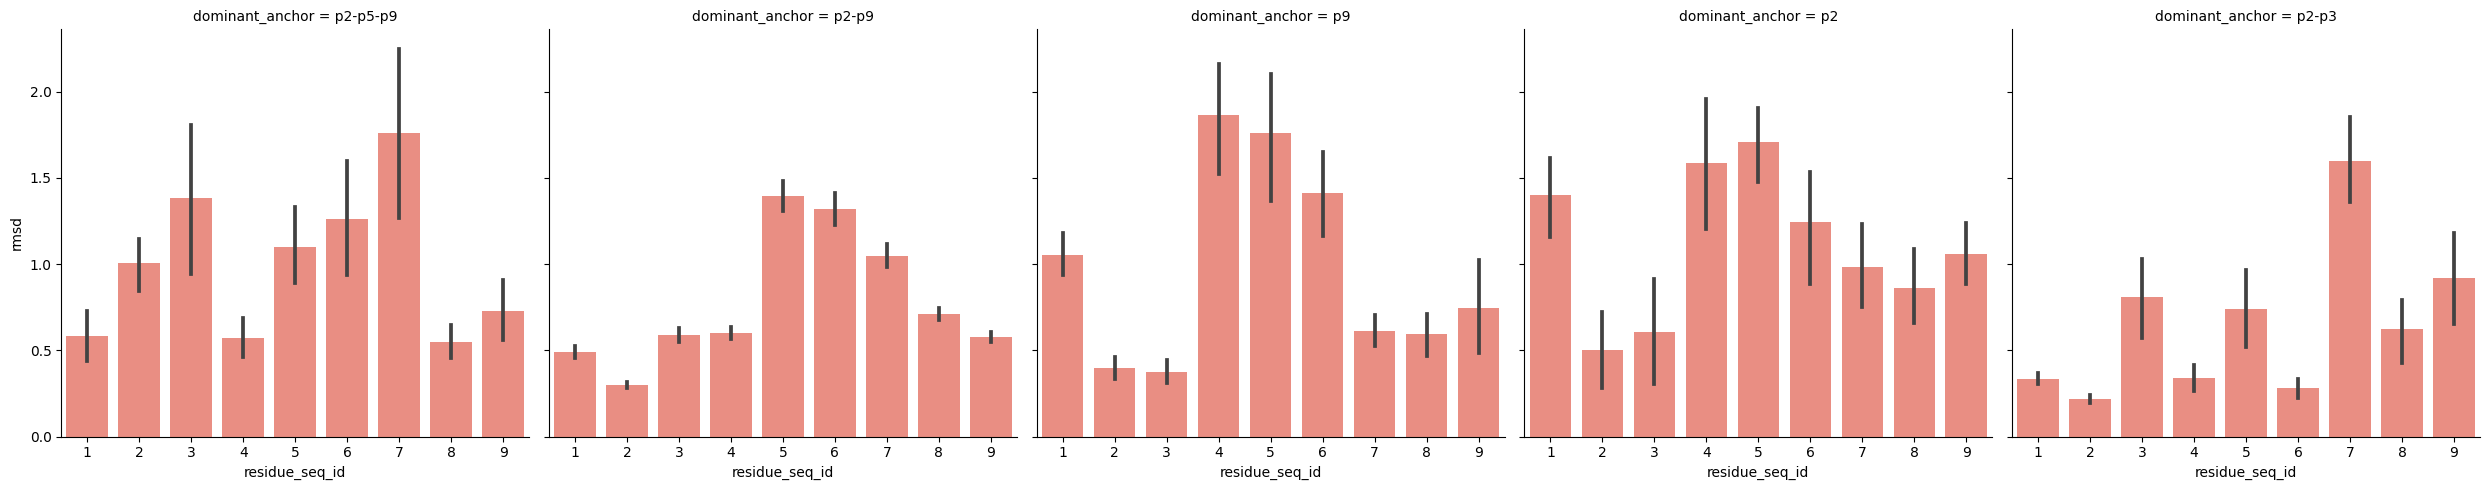

In [14]:
sns.catplot(peptide_apo_holo_comparison.query("anchoring_strategy_str != ''"),
            col='dominant_anchor',
            x='residue_seq_id', y='rmsd',
            sharex=False,
            color='salmon',
            kind='bar')

hla_a_02_01
p2-p9


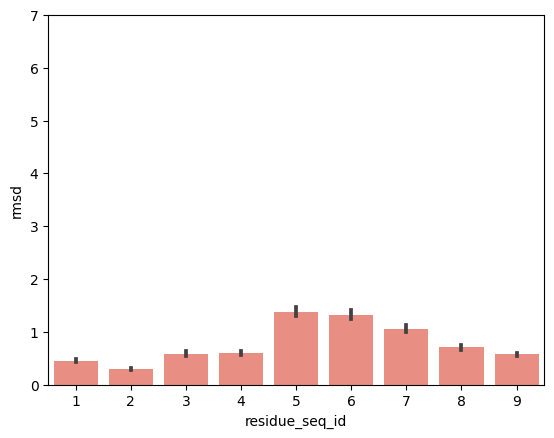

hla_a_02_06
p9


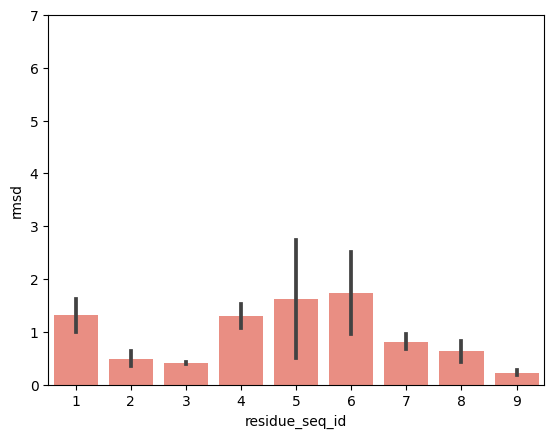

hla_a_03_01
p2-p9


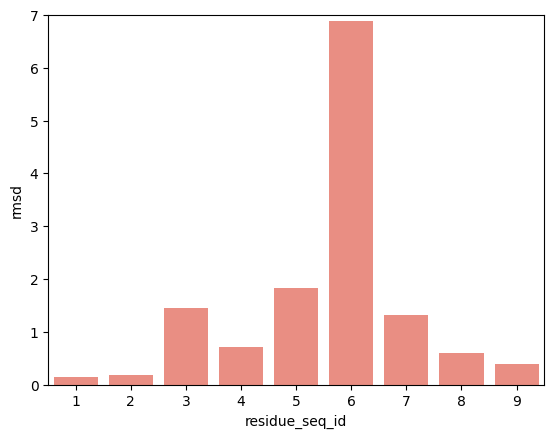

hla_a_24_02
p9


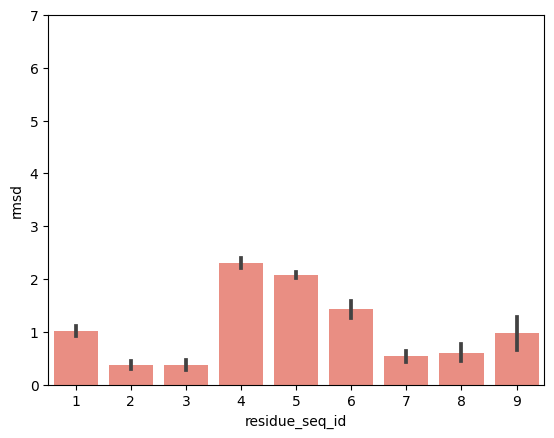

hla_b_08_01
p2-p5-p9


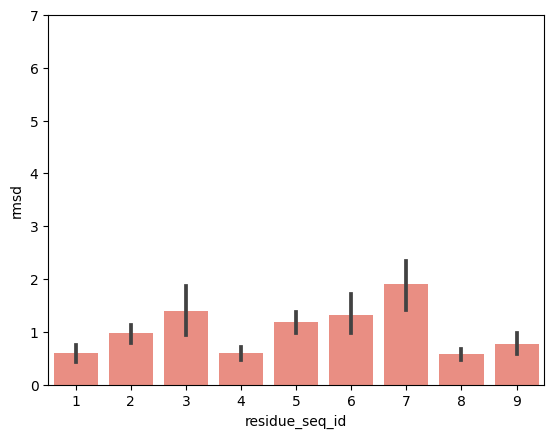

hla_b_35_01
p2


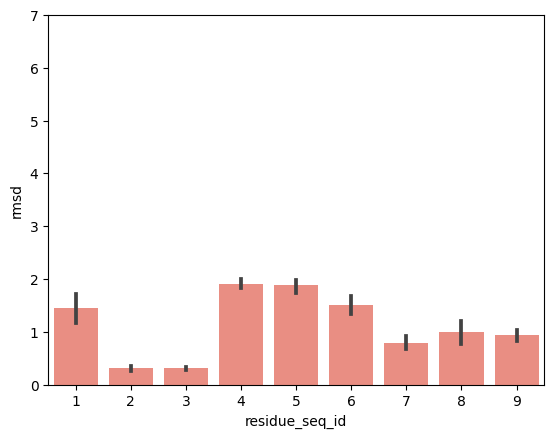

hla_b_37_01
p2-p5-p9


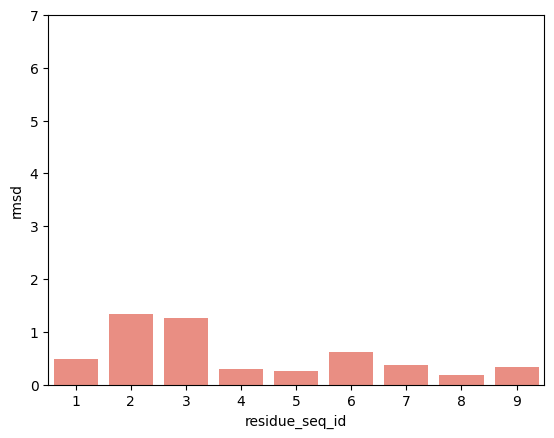

hla_b_42_01
p2-p9


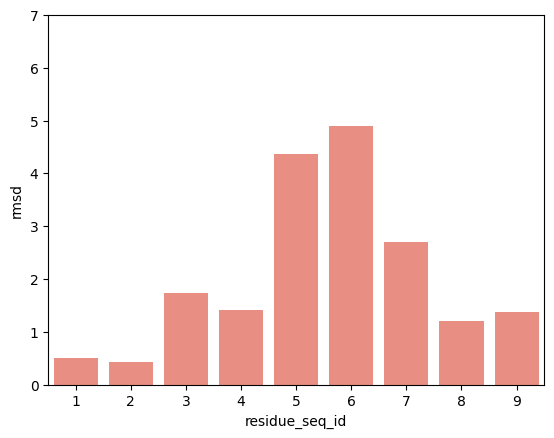

hla_b_44_05
p2


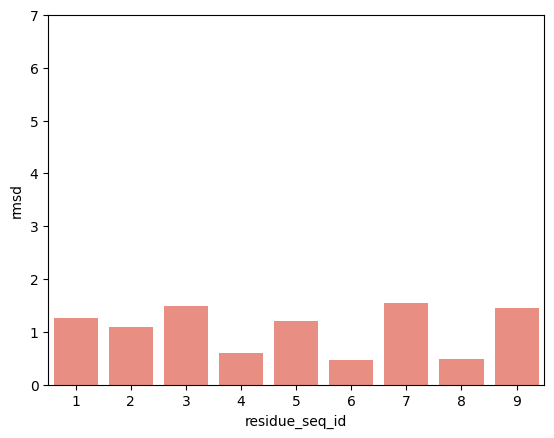

hla_b_53_01
p9


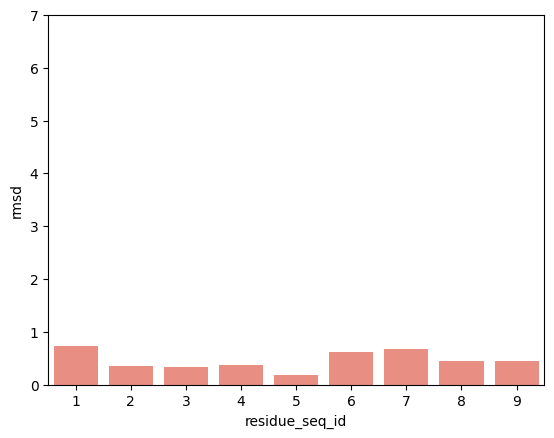

hla_b_81_01
p2-p9


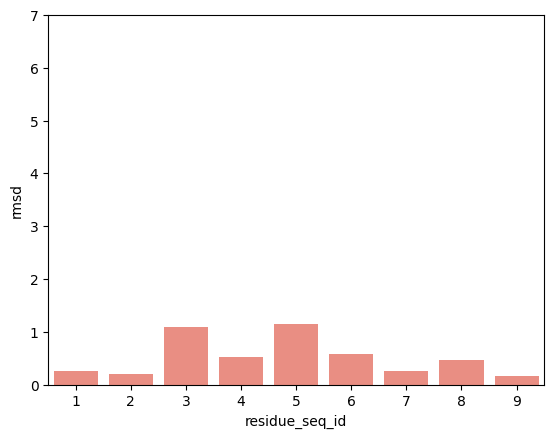

hla_c_08_02
p2-p3


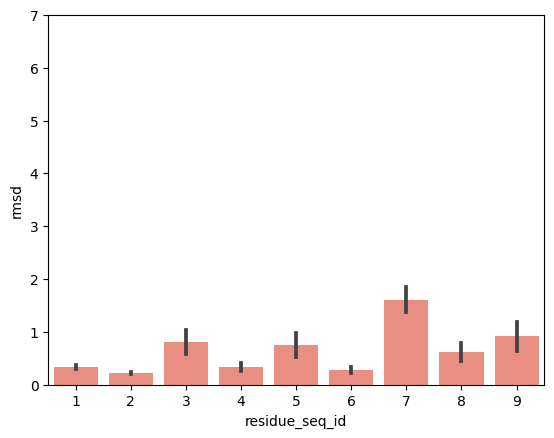

hla_e_01_03
p2-p9


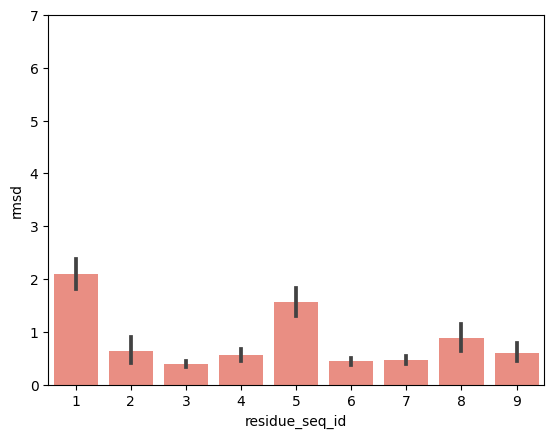

In [15]:
peptide_apo_holo_comparison_with_anchor = peptide_apo_holo_comparison.query("anchoring_strategy_str != ''")
max_rmsd = peptide_apo_holo_comparison_with_anchor['rmsd'].max()

for mhc_slug, group in peptide_apo_holo_comparison_with_anchor.groupby('mhc_slug'):
    print(mhc_slug)
    print(group['dominant_anchor'].unique()[0])
    plot = sns.barplot(group, x='residue_seq_id', y='rmsd', color='salmon')
    plot.set_ylim((0, np.ceil(max_rmsd)))
    plt.show()